In [1]:
import pandas as pd
import seaborn as sns
import pycaret.classification as pcclass
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [2]:
class imbalanced_classification:
    def __init__(self):
        self.df = pd.read_csv('./predict_failure.csv')
    def data_exploration(self):
        display(self.df)
        encoded_df = self.encode_categorical_columns()
        display(encoded_df)
        self.display_distribution_plots(encoded_df)
        display("number of failures:", self.df.failure.sum())
        display(sns.pairplot(encoded_df, x_vars=['failure']))
    def display_distribution_plots(self, encoded_df):
        for col in encoded_df.columns: 
            display(sns.displot(encoded_df, x=col))
    def encode_categorical_columns(self):
        encoded_df = self.df.copy()
        # encode date
        date_le = LabelEncoder()
        date_le.fit(self.df.date.values)
        date_encoded = list(date_le.transform(self.df.date.values))
        encoded_df.date = date_encoded
        # encode device
        device_le = LabelEncoder()
        device_le.fit(self.df.device.values)
        device_encoded = list(device_le.transform(self.df.device.values))
        encoded_df.device = device_encoded
        return encoded_df
    def train(self):
        pcclass.setup(self.df, target='failure', normalize=True, silent=True, fix_imbalance=True, log_experiment="mlflow", experiment_name="baseline", log_plots=True, data_split_stratify=True) 
        best_model = pcclass.compare_models(sort="f1", n_select=1)
        boosted_model = pcclass.ensemble_model(best_model, method="Boosting", optimize="f1")
        tuned_model = pcclass.tune_model(boosted_model, optimize="f1")
        self.final_model = pcclass.calibrate_model(tuned_model)
        pcclass.save_model(self.final_model, model_name='imbalanced_classification_model.pkl')
    def evaluate(self):
        display(pcclass.evaluate_model(self.final_model))
    def predict(self, df):
        """Will return the probabilities of the prediction appended to df"""
        self.final_model = pcclass.load_model('imbalanced_classification_model.pkl')
        predictions = pcclass.predict_model(self.final_model, df, raw_score=True)
        return predictions    
    def retrain(self, updated_df):
        self.final_model = pcclass.load_model('imbalanced_classification_model.pkl')
        pcclass.setup(updated_df, target='failure', silent=True, use_gpu=True, fix_imbalance=True, log_experiment="mlflow", experiment_name="retrain", log_plots=True) 
        updated_model = pcclass.finalize_model(self.final_model)
        pcclass.save_model(updated_model, 'imbalanced_classification_model.pkl')

def main():
    imb = imbalanced_classification()
    imb.train()
    imb.evaluate()


In [3]:
imb = imbalanced_classification()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,0,0,215630672,56,0,52,6,407438,0,0,7
1,0,2,0,61370680,0,3,0,6,403174,0,0,0
2,0,3,0,173295968,0,0,0,12,237394,0,0,0
3,0,4,0,79694024,0,0,0,6,410186,0,0,0
4,0,5,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,303,1044,0,18310224,0,0,0,10,353705,8,8,0
124490,303,1067,0,172556680,96,107,4,11,332792,0,0,13
124491,303,1074,0,19029120,4832,0,0,11,350410,0,0,0
124492,303,1080,0,226953408,0,0,0,12,358980,0,0,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


'number of failures:'

106

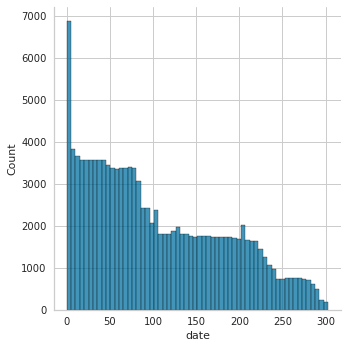

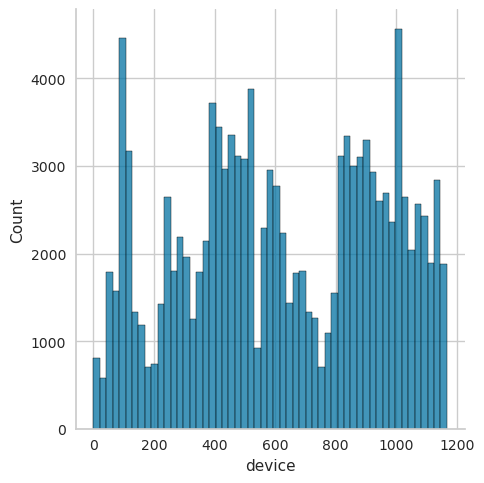

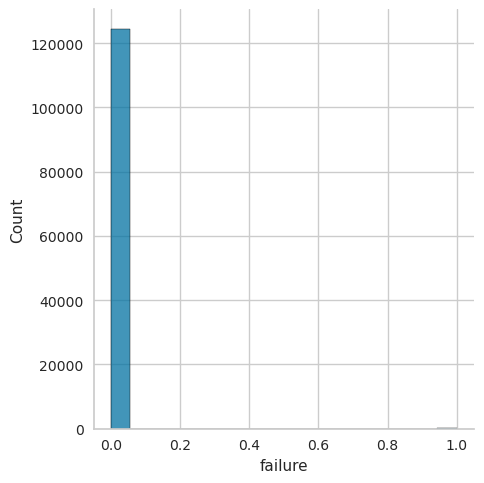

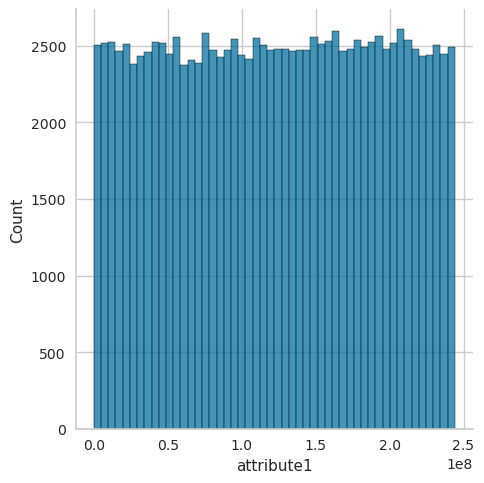

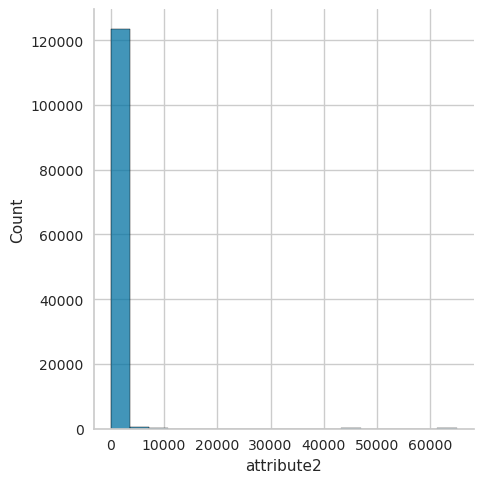

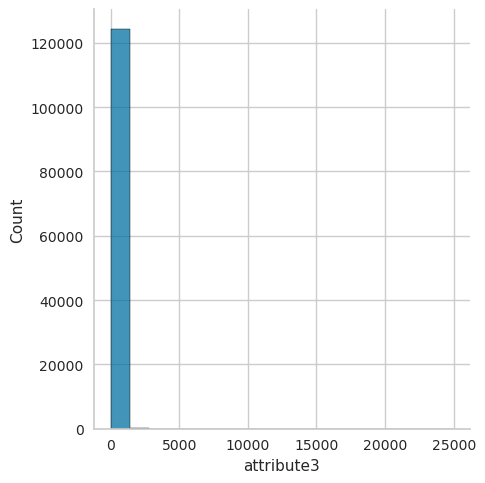

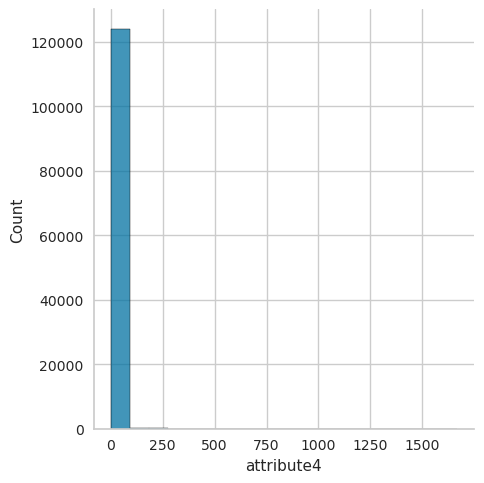

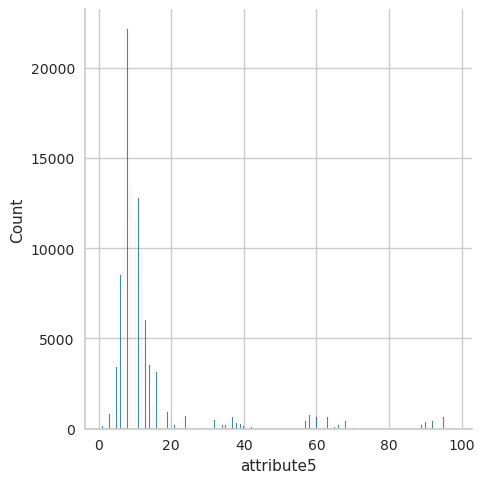

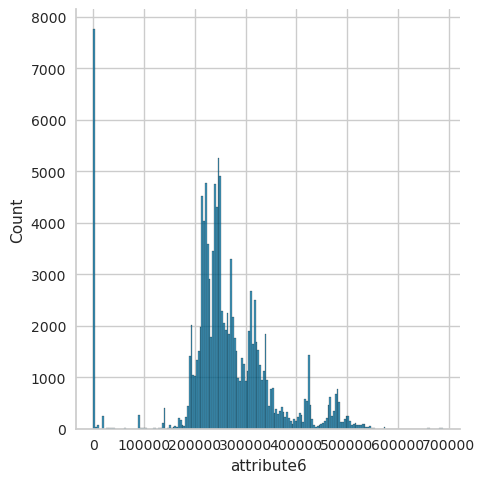

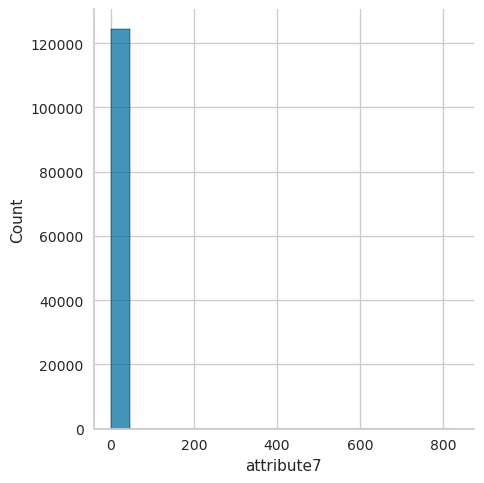

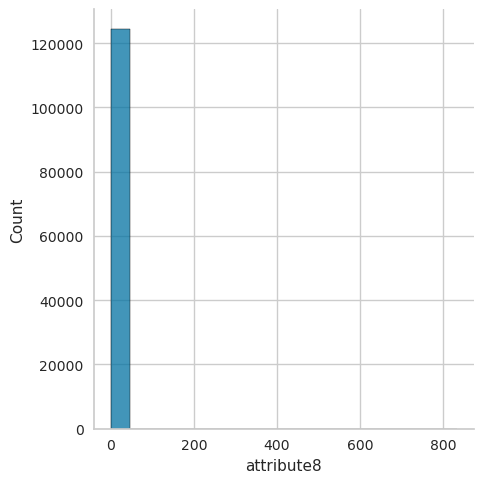

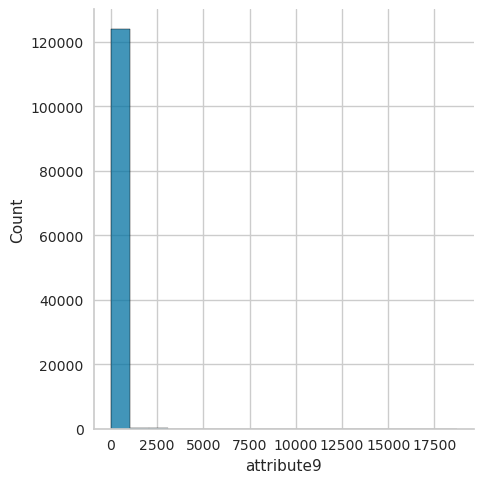

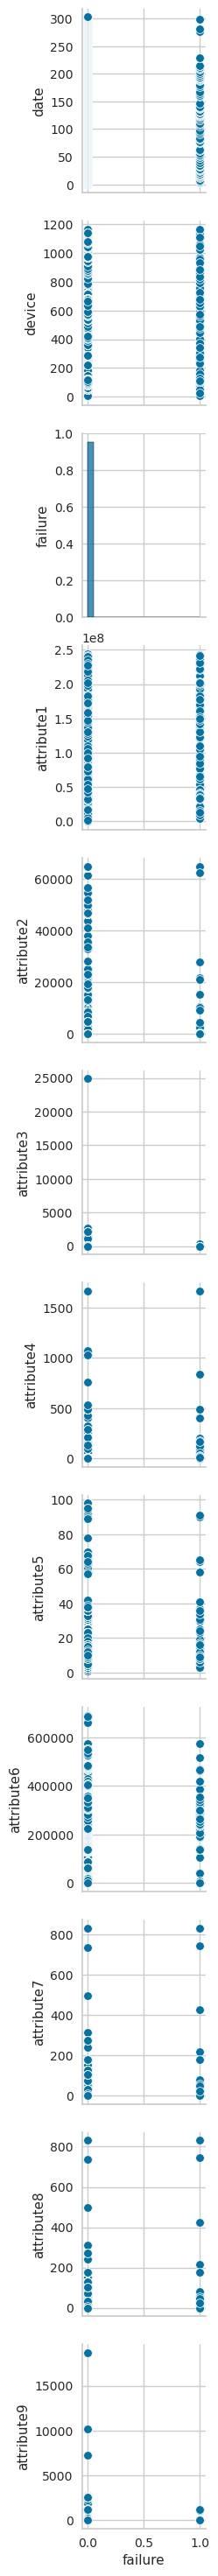

In [4]:
imb.data_exploration()

In [5]:
imb.train()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9992,0.9073,0.1429,0.5000,0.2222,0.2219,0.2670
1,0.9990,0.7463,0.0000,0.0000,0.0000,-0.0002,-0.0003
2,0.9991,0.8385,0.1250,0.5000,0.2000,0.1997,0.2497
3,0.9987,0.9694,0.1250,0.2000,0.1538,0.1532,0.1575
4,0.9989,0.7801,0.0000,0.0000,0.0000,-0.0004,-0.0005
5,0.9990,0.9051,0.0000,0.0000,0.0000,-0.0004,-0.0004
6,0.9991,0.9596,0.0000,0.0000,0.0000,-0.0002,-0.0003
7,0.9991,0.8771,0.0000,0.0000,0.0000,-0.0002,-0.0003
8,0.9992,0.8927,0.1429,0.5000,0.2222,0.2219,0.2670


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:48:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   19.3s remaining:    6.8s


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
imb.evaluate()